# Data Cleaning Exercise: Handling Missing Values and Outlier Detection

## Introduction
In this exercise, we will explore techniques for data cleaning, focusing on handling missing values and detecting outliers.
Data cleaning is a crucial step in data analytics to ensure high-quality data for analysis and modeling.


## Step 1: Importing Required Libraries
We start by importing the necessary Python libraries for data analysis.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2: Loading the Dataset
For this exercise, we will use a sample dataset with missing values and outliers.

In [4]:
# Creating a sample dataset
np.random.seed(42)
data = {
    'Age': np.random.randint(18, 70, 50).tolist() + [200],  # Adding an outlier
    'Salary': np.random.randint(30000, 100000, 50).tolist() + [500000],  # Adding an outlier
    'Experience': np.random.randint(0, 40, 50).tolist() + [100],  # Adding an outlier
}
df = pd.DataFrame(data)

# Introducing some missing values
df.loc[5, 'Age'] = np.nan
df.loc[10, 'Salary'] = np.nan
df.loc[15, 'Experience'] = np.nan

df.head()

,Age,Salary,Experience
0,56.0,73001.0,6.0
1,69.0,53897.0,8.0
2,46.0,98148.0,7.0
3,32.0,53483.0,11.0
4,60.0,78555.0,33.0


## Step 3: Handling Missing Values
Missing values can be handled by either removing or imputing them. Let's explore both methods.

In [5]:
# Checking for missing values
df.isnull().sum()

Age           1
Salary        1
Experience    1
dtype: int64

In [6]:
# Imputing missing values with the median
df.fillna(df.median(), inplace=True)
df.isnull().sum()  # Verifying if missing values are handled

Age           0
Salary        0
Experience    0
dtype: int64

## Step 4: Detecting Outliers
Outliers can be detected using various techniques such as boxplots and Z-scores.
We will use the IQR method and Z-score method.

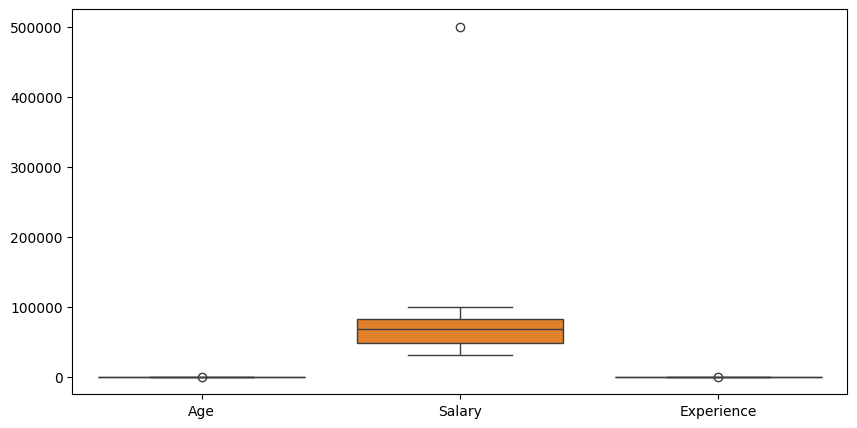

In [7]:
# Using Boxplot to visually identify outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.show()

In [8]:
# Detecting outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
df[outliers].dropna()

,Age,Salary,Experience
50,200.0,500000.0,100.0


In [9]:
# Removing outliers using the IQR method
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_cleaned.head()

,Age,Salary,Experience
0,56.0,73001.0,6.0
1,69.0,53897.0,8.0
2,46.0,98148.0,7.0
3,32.0,53483.0,11.0
4,60.0,78555.0,33.0


## Step 5: Conclusion
In this exercise, we:
- Loaded a dataset with missing values and outliers.
- Handled missing values by imputation.
- Used boxplots and the IQR method to detect and remove outliers.
Now, try experimenting with different datasets and methods to enhance your data cleaning skills!